Printing total execution time

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Sequential Processing Time: 30.09 seconds
All images processed and saved in output_seq/ folder.


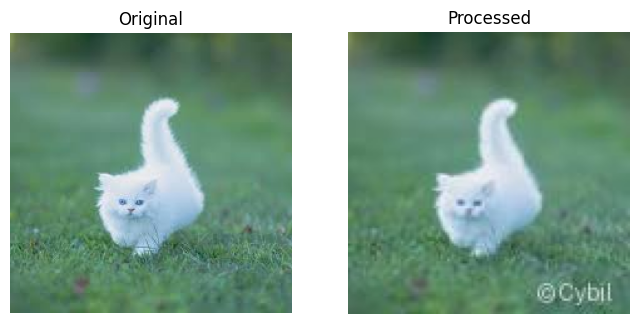

In [4]:
import os, time, random
from PIL import Image, ImageDraw, ImageFont
from google.colab import drive
import matplotlib.pyplot as plt

# mount (only if not already mounted)
drive.mount('/content/drive')

input_base = "/content/drive/MyDrive/Colab Notebooks/data_set"
output_base = "/content/output_seq"
os.makedirs(output_base, exist_ok=True)

start_time = time.time()

for root, dirs, files in os.walk(input_base):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            input_path = os.path.join(root, file)

            rel_path = os.path.relpath(root, input_base)
            output_folder = os.path.join(output_base, rel_path)
            os.makedirs(output_folder, exist_ok=True)
            output_path = os.path.join(output_folder, file)


            img = Image.open(input_path).convert("RGBA")
            img_resized = img.resize((128, 128))


            watermark_text = "© Cybil "
            try:

                font = ImageFont.truetype("DejaVuSans-Bold.ttf", 12)
            except:
                font = ImageFont.load_default()

            overlay = Image.new('RGBA', img_resized.size, (255,255,255,0))
            draw = ImageDraw.Draw(overlay)


            bbox = draw.textbbox((0,0), watermark_text, font=font)
            textwidth = bbox[2] - bbox[0]
            textheight = bbox[3] - bbox[1]

            x = img_resized.width - textwidth - 6
            y = img_resized.height - textheight - 6


            draw.text((x, y), watermark_text, font=font, fill=(255,255,255,180))


            watermarked = Image.alpha_composite(img_resized, overlay).convert("RGB")
            watermarked.save(output_path)

end_time = time.time()
print(f"Sequential Processing Time: {end_time - start_time:.2f} seconds")
print("All images processed and saved in output_seq/ folder.")

sample_class = random.choice([d for d in os.listdir(input_base) if os.path.isdir(os.path.join(input_base,d))])
sample_folder = os.path.join(input_base, sample_class)
sample_image = random.choice([f for f in os.listdir(sample_folder) if f.lower().endswith(('.jpg','.jpeg','.png'))])
sample_input = os.path.join(sample_folder, sample_image)
sample_output = os.path.join(output_base, sample_class, sample_image)

fig, axes = plt.subplots(1,2,figsize=(8,4))
axes[0].imshow(Image.open(sample_input))
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(Image.open(sample_output))
axes[1].set_title("Processed")
axes[1].axis('off')
plt.show()
